In [1]:
import sys
sys.path.append('..')

import os
from pathlib import Path

import re
import nltk 
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)


import numpy as np 

from src.embedders import LASEREmbedder
from src.pipelines import SentenceEmbedder
from src.tokenizers import TokenizerBert
 
import torch
import torch.nn as nn

In [2]:
# from deeppavlov.core.common.file import read_json
# from deeppavlov import build_model, configs
# from deeppavlov.core.models import BertModel

# bert_config = read_json(configs.embedder.bert_embedder)
# bert_config['metadata']['variables']['BERT_PATH'] = '../data/Embedders/SentenceBert/'
# from deeppavlov import build_model, configs
from transformers import BertModel, BertTokenizer

# m = build_model(configs.embedder.bert_sentence_embedder, download=True)
m = BertModel.from_pretrained('../data/Embedders/SentenceBert/')
tokenizer = TokenizerBert('../data/Tokenizers/BertTokenizer2/')
m.eval()
print()

In [3]:

def embed(text):
    text = '[CLS] '+text+' [SEP]'
    tokens = tokenizer.tokenize(text)


    with torch.no_grad():
        vector1 = torch.mean(m(tokens)[0], dim=1)
   
    return vector1[0].numpy()



print(len(embed("Привет")))




768


# Dataset creation

In [4]:
collection3_dir = Path('../data/Datasets/Collection3/')



In [5]:
documents = []




for e in os.listdir(collection3_dir):
    if '.txt' in e:
        text_file_path = Path(collection3_dir / e)
        ann_file_path = Path( collection3_dir / e.replace('.txt', '.ann'))
        print(text_file_path)
        
        # get ner annotations
        with open(str(ann_file_path), 'r') as f:
            file_data = f.read()
        
        file_data = file_data.replace('\t', ' ')

        ner_strings = file_data.split('\n')
        
        ner_data = []
        for ner_string in ner_strings:
            split_string = ner_string.split(' ')
            if len(split_string) < 4: continue
            ner_data.append([split_string[0], split_string[1], split_string[2],split_string[3],  ' '.join(split_string[4:])])
        
        #parsing txt file
        with open(str(text_file_path), 'r') as f:
            
            sentences = []
            lines = []
            s = 0
            for line in f:
                if line == '\n': 
                    s+=2
                    continue
                line = line.strip('\n')
                new_line = line
                lines.append(line)
                line_length = len(line)
#                 print(line)
                for ner_token in ner_data:
                    if int(ner_token[2]) < s or int(ner_token[3]) > line_length+s: 
                        continue
                    
                    
                    new_line = new_line.replace(line[int(ner_token[2])-s:int(ner_token[3])-s], ner_token[0]+"XXXXXXXXXXX", 1)
                    
                s+=line_length+2
                
#                 print(new_line)
                sentences.append(new_line)
        
        
        new_sentences = []
        
        
        
        
        for sentence in sentences:
            
            for s in nltk.sent_tokenize(sentence, language="russian"):
                new_sentences.append(s)
        
#         print('Before:')
#         print(len(sentences), sentences)
        
#         print('After:')
#         print(len(new_sentences), new_sentences)
        documents.append((ner_data, new_sentences))
        
        print("======================================================")    

../data/Datasets/Collection3/164.txt
../data/Datasets/Collection3/027.txt
../data/Datasets/Collection3/191.txt
../data/Datasets/Collection3/346.txt
../data/Datasets/Collection3/054.txt
../data/Datasets/Collection3/602.txt
../data/Datasets/Collection3/017.txt
../data/Datasets/Collection3/552.txt
../data/Datasets/Collection3/348.txt
../data/Datasets/Collection3/last_68.txt
../data/Datasets/Collection3/258.txt
../data/Datasets/Collection3/2013.txt
../data/Datasets/Collection3/15_01_13f.txt
../data/Datasets/Collection3/405.txt
../data/Datasets/Collection3/1035.txt
../data/Datasets/Collection3/1147.txt
../data/Datasets/Collection3/25_12_12c.txt
../data/Datasets/Collection3/046.txt
../data/Datasets/Collection3/596.txt
../data/Datasets/Collection3/116.txt
../data/Datasets/Collection3/098.txt
../data/Datasets/Collection3/406.txt
../data/Datasets/Collection3/last_30_new.txt
../data/Datasets/Collection3/427.txt
../data/Datasets/Collection3/1119.txt
../data/Datasets/Collection3/077.txt
../data/Da

../data/Datasets/Collection3/1117.txt
../data/Datasets/Collection3/2002.txt
../data/Datasets/Collection3/140.txt
../data/Datasets/Collection3/100.txt
../data/Datasets/Collection3/04_12_12d.txt
../data/Datasets/Collection3/186.txt
../data/Datasets/Collection3/1158.txt
../data/Datasets/Collection3/semenenko.txt
../data/Datasets/Collection3/04_02_13a_abdulatipov.txt
../data/Datasets/Collection3/138.txt
../data/Datasets/Collection3/267.txt
../data/Datasets/Collection3/278.txt
../data/Datasets/Collection3/1131.txt
../data/Datasets/Collection3/028.txt
../data/Datasets/Collection3/350.txt
../data/Datasets/Collection3/last_40.txt
../data/Datasets/Collection3/076.txt
../data/Datasets/Collection3/1022.txt
../data/Datasets/Collection3/1182.txt
../data/Datasets/Collection3/11_01_13b.txt
../data/Datasets/Collection3/518.txt
../data/Datasets/Collection3/last_55.txt
../data/Datasets/Collection3/2024.txt
../data/Datasets/Collection3/337.txt
../data/Datasets/Collection3/216.txt
../data/Datasets/Collect

../data/Datasets/Collection3/517.txt
../data/Datasets/Collection3/467.txt
../data/Datasets/Collection3/259.txt
../data/Datasets/Collection3/159.txt
../data/Datasets/Collection3/318.txt
../data/Datasets/Collection3/last_03.txt
../data/Datasets/Collection3/230.txt
../data/Datasets/Collection3/1139.txt
../data/Datasets/Collection3/451.txt
../data/Datasets/Collection3/211.txt
../data/Datasets/Collection3/528.txt
../data/Datasets/Collection3/496.txt
../data/Datasets/Collection3/last_64.txt
../data/Datasets/Collection3/last_53.txt
../data/Datasets/Collection3/222.txt
../data/Datasets/Collection3/last_26.txt
../data/Datasets/Collection3/1162.txt
../data/Datasets/Collection3/021.txt
../data/Datasets/Collection3/289.txt
../data/Datasets/Collection3/181.txt
../data/Datasets/Collection3/583.txt
../data/Datasets/Collection3/1168.txt
../data/Datasets/Collection3/129.txt
../data/Datasets/Collection3/020.txt
../data/Datasets/Collection3/459.txt
../data/Datasets/Collection3/324.txt
../data/Datasets/Co

../data/Datasets/Collection3/462.txt
../data/Datasets/Collection3/001.txt
../data/Datasets/Collection3/161.txt
../data/Datasets/Collection3/1008.txt
../data/Datasets/Collection3/253.txt
../data/Datasets/Collection3/026.txt
../data/Datasets/Collection3/332.txt
../data/Datasets/Collection3/1009.txt
../data/Datasets/Collection3/523.txt
../data/Datasets/Collection3/452.txt
../data/Datasets/Collection3/last_04.txt
../data/Datasets/Collection3/007.txt
../data/Datasets/Collection3/121.txt
../data/Datasets/Collection3/last_18.txt
../data/Datasets/Collection3/1169.txt
../data/Datasets/Collection3/354.txt
../data/Datasets/Collection3/599.txt
../data/Datasets/Collection3/1033.txt
../data/Datasets/Collection3/21_11_12j.txt
../data/Datasets/Collection3/363.txt
../data/Datasets/Collection3/148.txt
../data/Datasets/Collection3/099.txt
../data/Datasets/Collection3/172.txt
../data/Datasets/Collection3/last_52.txt
../data/Datasets/Collection3/555 (!).txt
../data/Datasets/Collection3/359.txt
../data/Data

../data/Datasets/Collection3/277.txt
../data/Datasets/Collection3/569.txt
../data/Datasets/Collection3/22_11_12d.txt
../data/Datasets/Collection3/2022.txt
../data/Datasets/Collection3/27_11_12a.txt
../data/Datasets/Collection3/22_11_12g.txt
../data/Datasets/Collection3/1189.txt
../data/Datasets/Collection3/286.txt
../data/Datasets/Collection3/633.txt
../data/Datasets/Collection3/1176.txt
../data/Datasets/Collection3/178.txt
../data/Datasets/Collection3/1135.txt
../data/Datasets/Collection3/281.txt
../data/Datasets/Collection3/335.txt
../data/Datasets/Collection3/27_11_12j.txt
../data/Datasets/Collection3/189.txt
../data/Datasets/Collection3/124.txt
../data/Datasets/Collection3/28_11_12h.txt
../data/Datasets/Collection3/1163.txt
../data/Datasets/Collection3/1141.txt
../data/Datasets/Collection3/293.txt
../data/Datasets/Collection3/chirkunov.txt
../data/Datasets/Collection3/470.txt
../data/Datasets/Collection3/019.txt
../data/Datasets/Collection3/136.txt
../data/Datasets/Collection3/410.

../data/Datasets/Collection3/005.txt
../data/Datasets/Collection3/475.txt
../data/Datasets/Collection3/1191.txt
../data/Datasets/Collection3/1159.txt
../data/Datasets/Collection3/402.txt
../data/Datasets/Collection3/125.txt
../data/Datasets/Collection3/22_11_12i.txt
../data/Datasets/Collection3/04_12_12g.txt
../data/Datasets/Collection3/299.txt
../data/Datasets/Collection3/426.txt
../data/Datasets/Collection3/562.txt
../data/Datasets/Collection3/398.txt
../data/Datasets/Collection3/1195.txt
../data/Datasets/Collection3/112.txt
../data/Datasets/Collection3/018.txt
../data/Datasets/Collection3/137.txt
../data/Datasets/Collection3/548.txt
../data/Datasets/Collection3/last_69.txt
../data/Datasets/Collection3/618.txt
../data/Datasets/Collection3/043.txt
../data/Datasets/Collection3/343.txt
../data/Datasets/Collection3/1180.txt
../data/Datasets/Collection3/015 (!).txt
../data/Datasets/Collection3/049.txt
../data/Datasets/Collection3/476.txt
../data/Datasets/Collection3/260.txt
../data/Datase

../data/Datasets/Collection3/082.txt
../data/Datasets/Collection3/540.txt
../data/Datasets/Collection3/154.txt
../data/Datasets/Collection3/579.txt
../data/Datasets/Collection3/last_67.txt
../data/Datasets/Collection3/246.txt
../data/Datasets/Collection3/157.txt
../data/Datasets/Collection3/030.txt
../data/Datasets/Collection3/616.txt
../data/Datasets/Collection3/430.txt
../data/Datasets/Collection3/425.txt
../data/Datasets/Collection3/450.txt
../data/Datasets/Collection3/504.txt
../data/Datasets/Collection3/1184.txt
../data/Datasets/Collection3/503.txt
../data/Datasets/Collection3/last_15.txt
../data/Datasets/Collection3/160.txt
../data/Datasets/Collection3/536.txt
../data/Datasets/Collection3/1116.txt
../data/Datasets/Collection3/2003.txt
../data/Datasets/Collection3/156.txt
../data/Datasets/Collection3/036.txt
../data/Datasets/Collection3/26_11_12f.txt
../data/Datasets/Collection3/084.txt
../data/Datasets/Collection3/442.txt
../data/Datasets/Collection3/1011.txt
../data/Datasets/Col

../data/Datasets/Collection3/411.txt
../data/Datasets/Collection3/2026.txt
../data/Datasets/Collection3/21_11_12i.txt
../data/Datasets/Collection3/1023.txt
../data/Datasets/Collection3/209.txt
../data/Datasets/Collection3/433.txt
../data/Datasets/Collection3/143.txt
../data/Datasets/Collection3/274.txt
../data/Datasets/Collection3/290.txt
../data/Datasets/Collection3/514.txt
../data/Datasets/Collection3/247.txt
../data/Datasets/Collection3/297.txt
../data/Datasets/Collection3/542.txt


In [6]:
sentences_count = 0


tokenized_sentences = []
sentence_entity_tags = []
for (ner_data, sentences) in documents:
    sentences_count += len(sentences)
    
    
    
    for sentence in sentences:
        words = word_tokenize(sentence)
        new_words = []
        entity_tags = []
        for word in words:
            if "XXXXXXXXXXX" in word:
                word = word.replace("XXXXXXXXXXX", '')
                for e in ner_data:
                    if e[0] == word:
                        
                        tokens = e[4].split(' ')
#                         for t in tokens:
#                             new_words.append(t)
#                             entity_tags.append(e[1])
                        new_words.append(e[4])
                        entity_tags.append(e[1])

            else:
                new_words.append(word)
                entity_tags.append('O')
        tokenized_sentences.append(new_words)
        sentence_entity_tags.append(entity_tags)
#         for e in zip(words, new_words, entity_tags):
#             print(e)
            
        
            
    

In [7]:
print(len(tokenized_sentences), len(sentence_entity_tags))

13868 13868


In [8]:
info = dict()


for s, e in zip (tokenized_sentences, sentence_entity_tags):
    number_of_entities = 0
    for tag in e:
        if tag != 'O':
            number_of_entities+=1

    if number_of_entities in info:
        info[number_of_entities]+=1
    else:
        info[number_of_entities]=1
        
        
print(info)

{1: 3770, 2: 3263, 3: 1887, 4: 997, 0: 2999, 6: 220, 18: 4, 12: 12, 9: 30, 7: 92, 5: 444, 8: 72, 10: 21, 15: 3, 14: 6, 13: 9, 34: 1, 11: 17, 16: 7, 19: 2, 21: 2, 17: 1, 26: 1, 27: 1, 20: 3, 29: 1, 30: 1, 35: 1, 36: 1}


dict_items([(1, 3770), (2, 3263), (3, 1887), (4, 997), (0, 2999), (6, 220), (18, 4), (12, 12), (9, 30), (7, 92), (5, 444), (8, 72), (10, 21), (15, 3), (14, 6), (13, 9), (34, 1), (11, 17), (16, 7), (19, 2), (21, 2), (17, 1), (26, 1), (27, 1), (20, 3), (29, 1), (30, 1), (35, 1), (36, 1)])


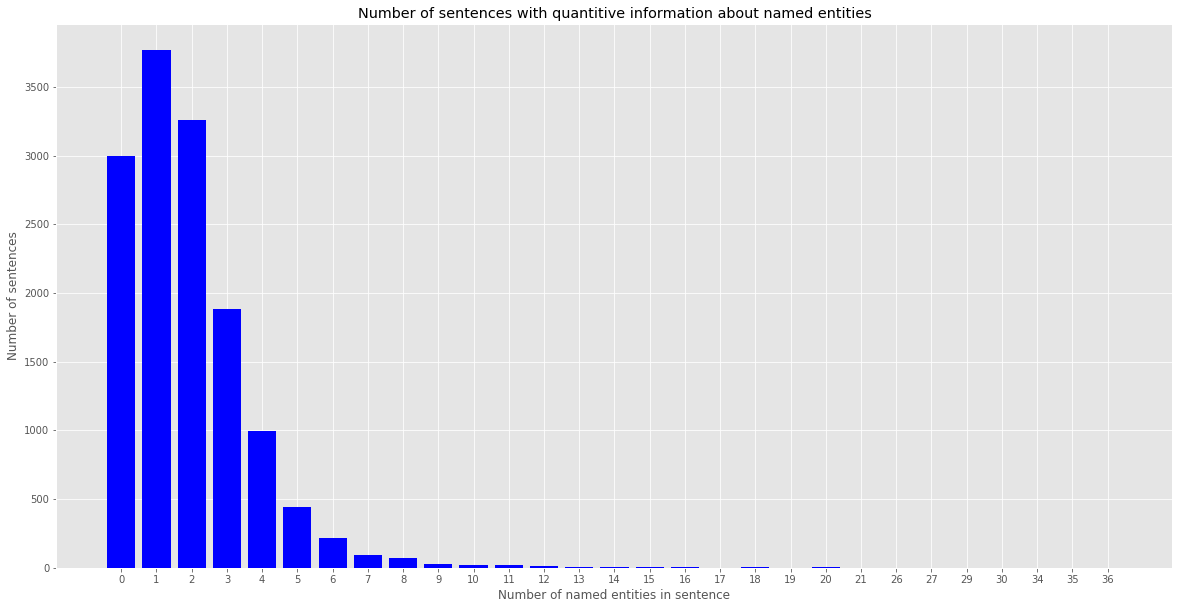

In [9]:

print(info.items())

values = sorted(info.items())

x = [e[0] for e in values]
y = [e[1] for e in values]

plt.style.use('ggplot')

# x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
# energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='blue')
plt.xlabel("Number of named entities in sentence")
plt.ylabel("Number of sentences")
plt.title("Number of sentences with quantitive information about named entities")

plt.xticks(x_pos, x)
plt.show()

In [10]:
sentences_with_2_entities = []
entity_tokens_for_sentences_2 = []

for s, e in zip (tokenized_sentences, sentence_entity_tags):
    number_of_entities = 0
    for tag in e:
        if tag != 'O':
            number_of_entities+=1

    if number_of_entities == 2:
        sentences_with_2_entities.append(s)
        entity_tokens_for_sentences_2.append(e)

        
for i in range(len(sentences_with_2_entities)):
    print(sentences_with_2_entities[i], entity_tokens_for_sentences_2[i])




['Премьер-министр', 'Японии', 'Наото Кан', 'огласил', 'новый', 'состав', 'правительства', 'страны', '.'] ['O', 'LOC', 'PER', 'O', 'O', 'O', 'O', 'O', 'O']
['Так', ',', 'бывшего', 'генерального', 'секретаря', 'правительства', 'Йошито Сенгоку', 'сменил', 'на', 'его', 'посту', 'Юкио Эдано', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'PER', 'O']
['Он', 'также', 'заверил', ',', 'что', 'в', 'случае', ',', 'если', 'Мубарак', 'уйдет', 'в', 'отставку', ',', '``', 'Братья-мусульмане', "''", 'не', 'будут', 'стремиться', 'к', 'единоличной', 'власти', 'в', 'стране', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['Сегодня', 'утром', 'неизвестные', 'расстреляли', 'машину', 'начальника', 'управления', 'информационной', 'политики', 'и', 'пресс-службы', 'президента', 'Дагестана', 'Гаруна Курбанова', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'PER', 'O']
['Около'

['В', 'то', 'же', 'время', 'потенциал', 'В.Януковича', 'дополнительно', 'эксперты', 'оценивают', 'на', 'уровне', '3-5', '%', "''", ',', '-', 'считает', 'А.Турчинов', '.'] ['O', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O']
['Напомним', ',', 'что', 'ЦИК', 'Украины', 'обработал', '95,5', '%', 'электронных', 'протоколов', 'участковых', 'избирательных', 'комиссий', '.'] ['O', 'O', 'O', 'ORG', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['Гендиректор', 'РБК', 'Юрий Ровенский', 'покидает', 'свой', 'пост'] ['O', 'ORG', 'PER', 'O', 'O', 'O']
['Как', 'заявил', 'господин', 'Ровенский', ',', 'позиция', ',', 'занятая', 'основателями', 'ОАО <РБК Информационные системы>', ',', 'не', 'привела', 'к', 'желаемым', 'результатам', '.'] ['O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['По', 'словам', 'господина', 'Ровенского', ',', 'он', 'с', '1', 'июля', '2009', 'г.', 'заявляет', 'о', 'сложении', 'с', 'себя',

['Напомним', ',', 'экс-глава', 'Кургана', 'Виктор Серков', '14', 'ноября', 'объявил', 'о', 'досрочном', 'прекращении', 'полномочий', '.'] ['O', 'O', 'O', 'LOC', 'PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['В', '1979', 'г.', 'окончил', 'Курганский машиностроительный институт', 'по', 'специальности', '``', 'инженер-механик', "''", 'и', 'курсы', 'повышения', 'квалификации', 'руководящего', 'состава', 'при', 'Московском высшем техническом училище им. Баумана', '.'] ['O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O']
['В', 'ноябре', '2004', 'года', 'в', 'четвертый', 'раз', 'избран', 'депутатом', 'городской', 'Думы', ',', 'является', 'заместителем', 'председателя', 'Курганской городской Думы', '.'] ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ORG', 'O', 'O', 'O', 'O', 'ORG', 'O']
['``', 'Уволить', 'Козака Владимира Васильевича', 'с', 'должности', 'генерального', 'директора', 'государственной', 'администрации', 'железнодорожного', 'тр

In [11]:
pair_tag_dict = {
    'LOC-LOC':[],
    'LOC-ORG':[],
    'LOC-PER':[],
    'ORG-ORG':[],
    'ORG-PER':[],
    'PER-PER':[],
}


In [12]:
for s, e in zip(sentences_with_2_entities, entity_tokens_for_sentences_2):
    
    pair_tag = []
    for tag in e:
        if tag != 'O':
            pair_tag.append(tag)
    pair_tag = sorted(pair_tag)
    
    if pair_tag[0] == 'LOC' and pair_tag[1] == 'LOC':
        pair_tag_dict['LOC-LOC'].append((s,e))
        
    if pair_tag[0] == 'LOC' and pair_tag[1] == 'ORG':
        pair_tag_dict['LOC-ORG'].append((s,e))
        
    if pair_tag[0] == 'LOC' and pair_tag[1] == 'PER':
        pair_tag_dict['LOC-PER'].append((s,e))
        
    if pair_tag[0] == 'ORG' and pair_tag[1] == 'ORG':
        pair_tag_dict['ORG-ORG'].append((s,e))
        
    if pair_tag[0] == 'ORG' and pair_tag[1] == 'PER':
        pair_tag_dict['ORG-PER'].append((s,e))
        
    if pair_tag[0] == 'PER' and pair_tag[1] == 'PER':
        pair_tag_dict['PER-PER'].append((s,e))

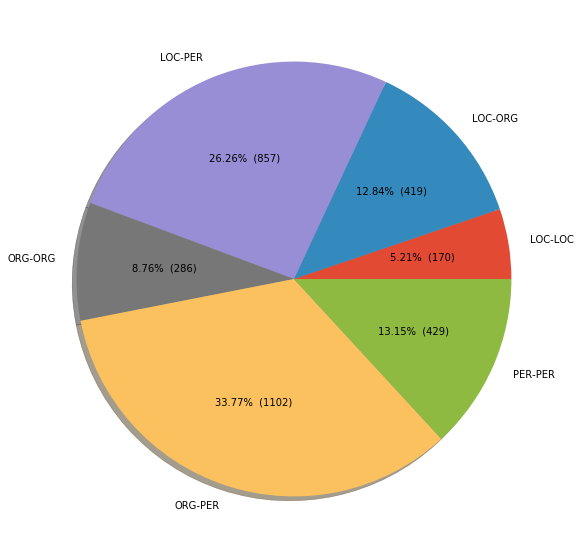

In [13]:
x = list(pair_tag_dict.keys())

y = [len(pair_tag_dict[e]) for e in x]
def my_autopct(values):
    def autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return autopct

fig1, ax1 = plt.subplots()
ax1.pie(y, labels=x, autopct=my_autopct(y),
        shadow=True, )
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
sentences_without_entities = []
for s, e in zip(sentences_with_2_entities, entity_tokens_for_sentences_2):
    sentence_without_entities = ''
    
    for i in range(len(e)):
        if e[i] == 'O':
            sentence_without_entities +=s[i]+' '
    sentences_without_entities.append(sentence_without_entities)




In [15]:
print(len(sentences_without_entities))


3263


In [ ]:
from tqdm.notebook import tqdm

# laser = LASEREmbedder('ru')

# sentences_embeddings = laser.embed(sentences_without_entities)
sentences_embeddings = [] 
for s in tqdm(sentences_without_entities, total=len(sentences_without_entities)):
    sentence_embedding = embed(s)
    sentences_embeddings.append(sentence_embedding)
    
    
sentences_embeddings = np.array(sentences_embeddings)
print(sentences_embeddings.shape)

In [ ]:
data_dict = {
    'sentences_embeddings': sentences_embeddings,
    'sentences': sentences_with_2_entities,
    'entities': entity_tokens_for_sentences_2,
    'sentences_without_entities': sentences_without_entities,
}

In [ ]:
import pickle 
with open('data2.pickle', 'wb') as f:
    pickle.dump(data_dict, f)
    


In [ ]:
print(sentences_with_2_entities)

# Clusterization

In [30]:
import sys
sys.path.append('..')

import os
from pathlib import Path

import re
import nltk 
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

from tqdm.notebook import tqdm
import numpy as np 
import pickle

from src.embedders import LASEREmbedder

In [2]:
with open('data.pickle', 'rb') as f:
    data_dict = pickle.load(f)


In [4]:
data_dict.keys()

dict_keys(['sentences_embeddings', 'sentences', 'entities', 'sentences_without_entities'])

In [5]:
print(data_dict['sentences_embeddings'])

[[ 3.7036524e-03  3.6355184e-05 -6.8229926e-04 ...  2.6827652e-02
  -6.9368882e-03  9.1848085e-03]
 [ 1.9187059e-02  6.6152522e-03  2.6461150e-02 ...  2.6461633e-02
   3.5657634e-03  9.9599957e-03]
 [ 9.9628419e-03 -1.9249797e-05  2.0217979e-02 ...  4.9015634e-02
   8.0924472e-03  1.9063871e-02]
 ...
 [ 9.4517134e-03  8.0866637e-03  1.7446375e-02 ...  1.2859862e-02
   2.9719155e-02  3.0339286e-03]
 [ 1.0557393e-02 -5.2657437e-05  4.4975481e-03 ...  4.8239082e-02
   1.1767855e-02  2.9148472e-02]
 [ 1.5936881e-02 -2.7375314e-05  2.6948471e-03 ... -2.1521202e-03
   8.1575271e-03  3.0372236e-02]]


In [12]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=20, covariance_type='full')

model.fit(data_dict['sentences_embeddings'])
labels = model.predict(data_dict['sentences_embeddings'])

In [13]:
print(labels)

[ 9  9 11 ...  7 16 19]


In [26]:
import numpy as np 
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(data_dict['sentences_embeddings'])
X_embedded.shape 

(3263, 2)

In [27]:
print(X_embedded)

[[ 18.784742    -0.41746682]
 [ 17.800018    -4.670469  ]
 [-11.322858    38.19533   ]
 ...
 [-10.288213    10.365825  ]
 [ 49.07061     20.414896  ]
 [-14.233185    51.053425  ]]


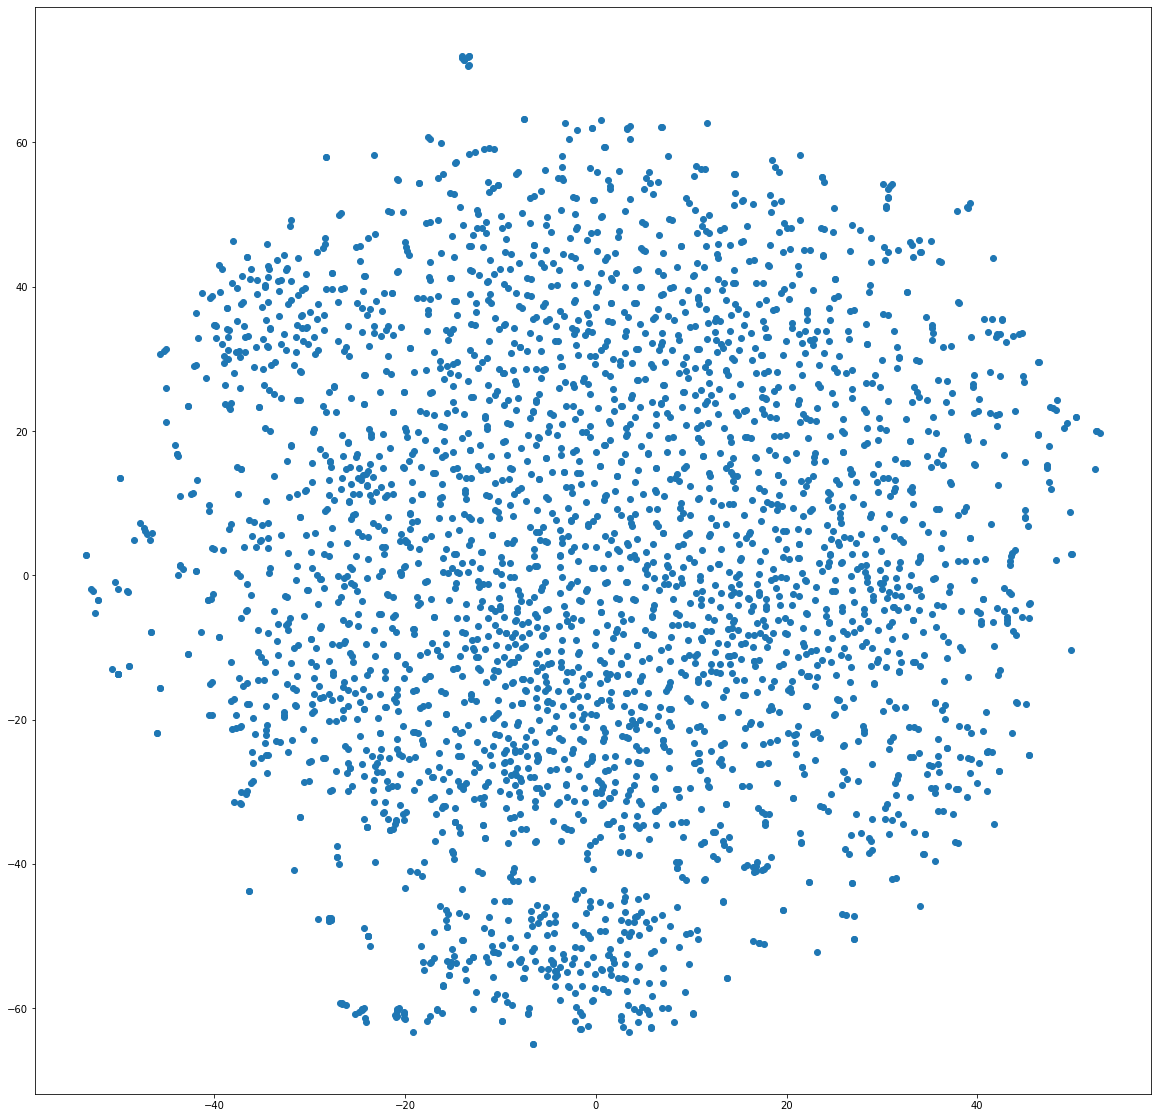

In [28]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1]);
plt.show()

In [ ]:
number_of_centroids = 30


models = []

for i in tqdm(range(1, number_of_centroids), total=number_of_centroids-1):
    model = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(data_dict['sentences_embeddings']) 
    models.append(model)
    
    
plt.plot(n_components, [m.bic(data_dict['sentences_embeddings']) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_dict['sentences_embeddings']) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()



In [ ]:
impo